<a href="https://colab.research.google.com/github/geonextgis/End-to-End-Deep-Learning/blob/main/01_ANN/05_Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Admission Prediction using ANN**

## **Import Required Libraries**

In [62]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

## **Read the Data from Kaggle**

In [64]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [65]:
# Download the data from kaggle
!kaggle datasets download -d mohansacharya/graduate-admissions

graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:
# Extract the Zipfile
import zipfile
zipref = zipfile.ZipFile("/content/graduate-admissions.zip")
zipref.extractall("/content")
zipref.close()

In [67]:
# Read the data in a pandas dataframe
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
print(df.shape)
df.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## **Data Preprocessing**

In [68]:
# Check the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [69]:
# Check for duplicated rows
df.duplicated().sum()

0

In [70]:
# Drop the 'Serial No.' column
df.drop("Serial No.", axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## **Train Test Split**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Chance of Admit ", axis=1),
                                                    df["Chance of Admit "],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((400, 7), (100, 7))

## **Feature Scaling**

In [72]:
# Apply MinMaxScaler to all the columns

# Instantiate a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit the training data
minmax_scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [73]:
# Convert the scaled arrays into pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [74]:
X_train_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.96,0.892857,0.75,0.625,0.875,0.852564,1.0
1,0.58,0.642857,0.50,0.500,0.375,0.637821,0.0
2,0.92,0.714286,1.00,1.000,1.000,0.948718,1.0
3,0.36,0.464286,0.75,0.500,0.375,0.368590,1.0
4,0.62,0.607143,0.50,0.500,0.750,0.448718,1.0


## **Build an Artifical Neural Network Architecture**

In [75]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 7 nodes into the Sequential Model
model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="linear"))

In [76]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="Adam")

In [78]:
# Fit the training data
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 3.1198 - val_loss: 2.7801
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 2.4527 - val_loss: 2.1151
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 1.8225 - val_loss: 1.5013
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 1.2568 - val_loss: 0.9904
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8114 - val_loss: 0.5935
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4653 - val_loss: 0.3198
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2409 - val_loss: 0.1486
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1076 - val_loss: 0.0601
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0434 - val_loss: 0.0233
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0186 - val_loss: 0.0128
Epoch 11

## **Accuracy Assessment**

In [79]:
# Predict the test data
y_pred = model.predict(X_test_scaled)
# y_pred

4/4 [==============================] - 0s 3ms/step


In [80]:
# Check the accurcay of the model
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.7365609875992907


## **Plot the Training and Validation Loss**

In [81]:
# Print the key names of the history dictionary
history.history.keys()

dict_keys(['loss', 'val_loss'])

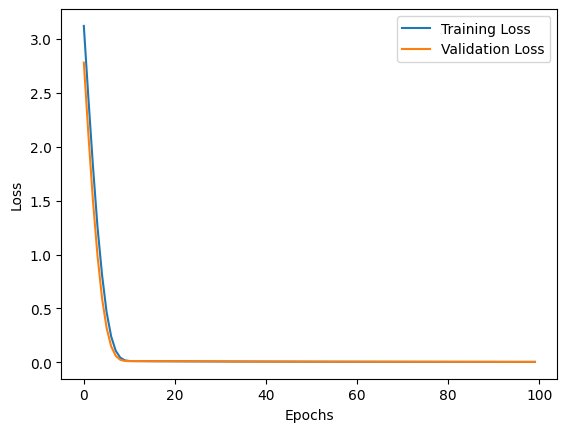

In [82]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()